# The Battle of Stockholm Neighborhoods: Opening a Gym

As a part of the final IBM Capstone Project, I get to try what data scientists go through in real life. Objectives of the final assignments included: definition of a business problem, searching for data in the web and applying Foursquare location data to compare different districts within municipalities of a city of one's choice. During the presentation of the assignment results, I will go through the problem designing, data preparation and final analysis section step by step. Detailed codes and images are given in Github and link can be found at the end of the post.

# Introduction

Sweden is one of the world´s most sporting nations in relation to its geography and population. 
More than three million of its inhabitants between the ages 6 and 80 are members of a sports club – as active competitors, to keep fit or as leaders, trainers or supporters.
Sport in Sweden focuses particularly on youth sports and sport-for all.
There are about half a million leaders in the sports movement, the majority of whom are volunteers.
The financial value of the annual contribution provided by voluntary leaders is estimated to be EUR 2 billion.
Being involved in sport in clubs helps people to feel good, both physically and mentally.
It is not just the physical activity that is positive, but also all of the meeting places in sport where participants experience fellowship and participate socially.
The definition of business problem has come to me naturally:which municipality in the county of Stockholm would be good for opening a gym?

# Potential Stakeholders


Result might be useful for:​someone who is moving to Stockholm and would like to find an area that fits their active lifestyle; someone who is thinking about opening a gym in Stockholm and would like to find a suitable area for that.

# Data preparation

## Getting the source data

In [1]:
# Importing all the libraries to be used in this assignment.
import numpy as np 
import pandas as pd 
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import lxml
print('Libraries imported.')

Libraries imported.


In [2]:
#get the list of Stockholm municipalities
response = requests.get('https://en.wikipedia.org/wiki/Stockholm_County').text
soup = BeautifulSoup(response, 'lxml')

In [3]:
#Using web scrapping to obtain data from Wikipedia
stockholm_table = soup.find('table', {'class':'sortable wikitable'})
df_sthlmkommuner = pd.read_html(str(stockholm_table))[0]
headers = ['Sthlm Municipality','Population','Area size, km']
df_sthlmkommuner.columns = headers
df_sthlmkommuner.head()

,Sthlm Municipality,Population,"Area size, km"
0,Botkyrka,93106,194
1,Danderyd,33187,26
2,Ekerö,28308,217
3,Haninge,89989,458
4,Huddinge,111722,131


In [4]:
#calculationg density
df_sthlmkommuner['Density'] = (df_sthlmkommuner['Population']/df_sthlmkommuner['Area size, km'])
df_sthlmkommuner.head(26)

,Sthlm Municipality,Population,"Area size, km",Density
0,Botkyrka,93106,194,479.927835
1,Danderyd,33187,26,1276.423077
2,Ekerö,28308,217,130.451613
3,Haninge,89989,458,196.482533
4,Huddinge,111722,131,852.839695
5,Järfälla,78480,54,1453.333333
6,Lidingö,47818,31,1542.516129
7,Nacka,103656,95,1091.115789
8,Norrtälje,61769,2015,30.654591
9,Nykvarn,10923,153,71.392157


In [5]:
#Using geolocator to obtain coordinated for municipalities of Stockholm County
geolocator = Nominatim(user_agent="foursquare_agent")
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df_sthlmkommuner['location'] = df_sthlmkommuner['Sthlm Municipality'].apply(geocode)
df_sthlmkommuner['lat'] = df_sthlmkommuner['location'].apply(lambda loc: loc.point[0] if loc else None)
df_sthlmkommuner['lon'] = df_sthlmkommuner['location'].apply(lambda loc: loc.point[1] if loc else None)

df_sthlmkommuner.head()

,Sthlm Municipality,Population,"Area size, km",Density,location,lat,lon
0,Botkyrka,93106,194,479.927835,"(Botkyrka kommun, Stockholms län, Sverige, (59...",59.203449,17.854598
1,Danderyd,33187,26,1276.423077,"(Danderyds kommun, Stockholms län, Sverige, (5...",59.400000,18.050000
2,Ekerö,28308,217,130.451613,"(Ekerö kommun, Stockholms län, Sverige, (59.33...",59.333333,17.600000
3,Haninge,89989,458,196.482533,"(Haninge kommun, Stockholms län, Sverige, (59....",59.049722,18.266667
4,Huddinge,111722,131,852.839695,"(Huddinge, Huddinge kommun, Stockholms län, 14...",59.229383,17.974881


In [6]:
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [7]:
import folium # map rendering library

In [8]:
#Using the folium library to visualise stockholm county and make a reasonablity check
address = 'Stockholm, SE'

geolocator = Nominatim(user_agent="Stockholm_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Stockholm are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Stockholm are 59.3251172, 18.0710935.


In [9]:
map_sthlmkommuner = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough in zip(df_sthlmkommuner['lat'], df_sthlmkommuner['lon'], df_sthlmkommuner['Sthlm Municipality']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_sthlmkommuner)  
    
map_sthlmkommuner

# Methodology

In [10]:
#Using Foursquare APL to get the data about Venues
CLIENT_ID = 'SV2UAFMDKNR4ESRWKIZ5FKFURVHSFNBUIB2AWPVG0BXV2ACV'
CLIENT_SECRET = '1H1GP4SEXHQLNSIWJMOWKVRRMVTKTOACOR30I4PDM5MAEKEZ'
VERSION = '20180605' 
LIMIT = 100 

In [11]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [12]:
categories_list = []

def print_categories(categories, level=1, max_level=10):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'],1, 4)

-Arts & Entertainment (4d4b7104d754a06370d81259)
--Amphitheater (56aa371be4b08b9a8d5734db)
--Aquarium (4fceea171983d5d06c3e9823)
--Arcade (4bf58dd8d48988d1e1931735)
--Art Gallery (4bf58dd8d48988d1e2931735)
--Bowling Alley (4bf58dd8d48988d1e4931735)
--Casino (4bf58dd8d48988d17c941735)
--Circus (52e81612bcbc57f1066b79e7)
--Comedy Club (4bf58dd8d48988d18e941735)
--Concert Hall (5032792091d4c4b30a586d5c)
--Country Dance Club (52e81612bcbc57f1066b79ef)
--Disc Golf (52e81612bcbc57f1066b79e8)
--Escape Room (5f2c2834b6d05514c704451e)
--Exhibit (56aa371be4b08b9a8d573532)
--General Entertainment (4bf58dd8d48988d1f1931735)
--Go Kart Track (52e81612bcbc57f1066b79ea)
--Historic Site (4deefb944765f83613cdba6e)
--Karaoke Box (5744ccdfe4b0c0459246b4bb)
--Laser Tag (52e81612bcbc57f1066b79e6)
--Memorial Site (5642206c498e4bfca532186c)
--Mini Golf (52e81612bcbc57f1066b79eb)
--Movie Theater (4bf58dd8d48988d17f941735)
---Drive-in Theater (56aa371be4b08b9a8d5734de)
---Indie Movie Theater (4bf58dd8d48988d17e

In [13]:
gymcategories_list = [('Boxing Gym', '52f2ab2ebcbc57f1066b8b47'),
 ('Climbing Gym', '503289d391d4c4b30a586d6a'),
 ('Cycle Studio', '52f2ab2ebcbc57f1066b8b49'),
 ('Gym Pool', '4bf58dd8d48988d105941735'),
 ('Gymnastics Gym', '52f2ab2ebcbc57f1066b8b48'),
 ('Gym', '4bf58dd8d48988d176941735'),
 ('Martial Arts School', '4bf58dd8d48988d101941735'),
 ('Outdoor Gym', '58daa1558bbb0b01f18ec203'),
 ('Pilates Studio', '5744ccdfe4b0c0459246b4b2'),
 ('Track', '4bf58dd8d48988d106941735'),
 ('Weight Loss Center', '590a0744340a5803fd8508c3'),
 ('Yoga Studio', '4bf58dd8d48988d102941735'),]

In [14]:
def get_venues_count(ll, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                ll,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [15]:
df_sthlmgyms= df_sthlmkommuner.copy()
for c in gymcategories_list:
    df_sthlmgyms[c[0]] = 0
df_sthlmgyms.head()

,Sthlm Municipality,Population,"Area size, km",Density,location,lat,lon,Boxing Gym,Climbing Gym,Cycle Studio,Gym Pool,Gymnastics Gym,Gym,Martial Arts School,Outdoor Gym,Pilates Studio,Track,Weight Loss Center,Yoga Studio
0,Botkyrka,93106,194,479.927835,"(Botkyrka kommun, Stockholms län, Sverige, (59...",59.203449,17.854598,0,0,0,0,0,0,0,0,0,0,0,0
1,Danderyd,33187,26,1276.423077,"(Danderyds kommun, Stockholms län, Sverige, (5...",59.400000,18.050000,0,0,0,0,0,0,0,0,0,0,0,0
2,Ekerö,28308,217,130.451613,"(Ekerö kommun, Stockholms län, Sverige, (59.33...",59.333333,17.600000,0,0,0,0,0,0,0,0,0,0,0,0
3,Haninge,89989,458,196.482533,"(Haninge kommun, Stockholms län, Sverige, (59....",59.049722,18.266667,0,0,0,0,0,0,0,0,0,0,0,0
4,Huddinge,111722,131,852.839695,"(Huddinge, Huddinge kommun, Stockholms län, 14...",59.229383,17.974881,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
for i, row in df_sthlmgyms.iterrows():
    for c in gymcategories_list:        
        df_sthlmgyms.loc[i, c[0]] = get_venues_count(str(df_sthlmgyms.loc[i,'lat'])+', ' + str(df_sthlmgyms.loc[i,'lon']), radius=15000, categoryId=c[1])
    df_sthlmgyms.to_csv('gym venues.csv')

In [17]:
df_sthlmgyms = pd.read_csv('gym venues.csv', index_col=0)
df_sthlmgyms.head()

,Sthlm Municipality,Population,"Area size, km",Density,location,lat,lon,Boxing Gym,Climbing Gym,Cycle Studio,Gym Pool,Gymnastics Gym,Gym,Martial Arts School,Outdoor Gym,Pilates Studio,Track,Weight Loss Center,Yoga Studio
0,Botkyrka,93106,194,479.927835,"Botkyrka kommun, Stockholms län, Sverige",59.203449,17.854598,0,3,1,8,2,23,1,0,1,6,3,0
1,Danderyd,33187,26,1276.423077,"Danderyds kommun, Stockholms län, Sverige",59.400000,18.050000,8,6,3,31,4,121,11,8,7,8,14,19
2,Ekerö,28308,217,130.451613,"Ekerö kommun, Stockholms län, Sverige",59.333333,17.600000,0,0,0,0,0,6,1,0,0,0,0,0
3,Haninge,89989,458,196.482533,"Haninge kommun, Stockholms län, Sverige",59.049722,18.266667,0,0,0,0,0,2,0,0,0,0,1,0
4,Huddinge,111722,131,852.839695,"Huddinge, Huddinge kommun, Stockholms län, 141...",59.229383,17.974881,7,5,3,24,4,113,9,7,7,11,13,18


In [18]:
df_gymsboxplot=df_sthlmgyms.drop(columns=['Sthlm Municipality', 'Population', 'Area size, km'	, 'Density', 'location', 'lat', 'lon'])
df_gymsboxplot.head()

,Boxing Gym,Climbing Gym,Cycle Studio,Gym Pool,Gymnastics Gym,Gym,Martial Arts School,Outdoor Gym,Pilates Studio,Track,Weight Loss Center,Yoga Studio
0,0,3,1,8,2,23,1,0,1,6,3,0
1,8,6,3,31,4,121,11,8,7,8,14,19
2,0,0,0,0,0,6,1,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,0,1,0
4,7,5,3,24,4,113,9,7,7,11,13,18


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

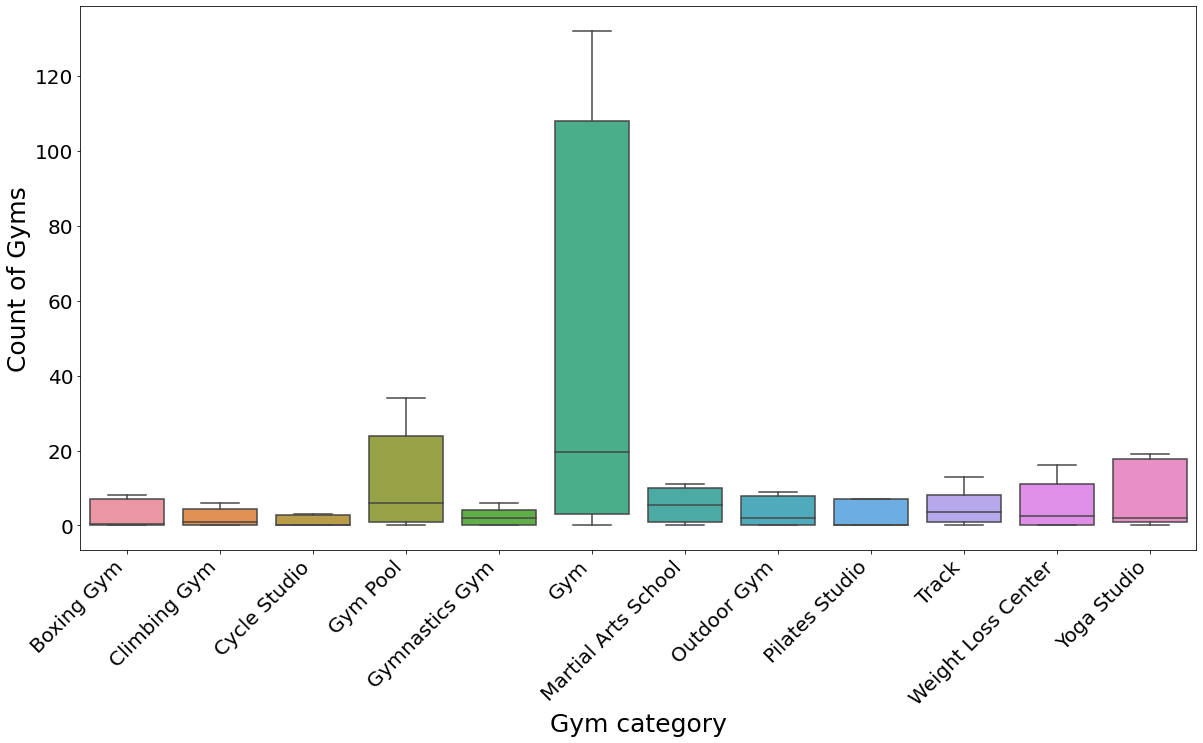

In [20]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation='vertical')
sns.boxplot

ax = sns.boxplot(data = df_gymsboxplot)
ax.set_ylabel('Count of Gyms', fontsize=25)
ax.set_xlabel('Gym category', fontsize=25)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [21]:
df_gymkommuner=df_sthlmgyms.drop(columns=['Population', 'Area size, km'	, 'Density', 'location', 'Sthlm Municipality'])
df_gymkommuner.head()

,lat,lon,Boxing Gym,Climbing Gym,Cycle Studio,Gym Pool,Gymnastics Gym,Gym,Martial Arts School,Outdoor Gym,Pilates Studio,Track,Weight Loss Center,Yoga Studio
0,59.203449,17.854598,0,3,1,8,2,23,1,0,1,6,3,0
1,59.400000,18.050000,8,6,3,31,4,121,11,8,7,8,14,19
2,59.333333,17.600000,0,0,0,0,0,6,1,0,0,0,0,0
3,59.049722,18.266667,0,0,0,0,0,2,0,0,0,0,1,0
4,59.229383,17.974881,7,5,3,24,4,113,9,7,7,11,13,18


In [22]:
df_gymkommuner.describe()

,lat,lon,Boxing Gym,Climbing Gym,Cycle Studio,Gym Pool,Gymnastics Gym,Gym,Martial Arts School,Outdoor Gym,Pilates Studio,Track,Weight Loss Center,Yoga Studio
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,58.804846,12.604646,2.923077,2.192308,1.153846,12.346154,2.346154,47.653846,5.653846,3.384615,2.615385,4.538462,5.461538,7.500000
std,2.833723,27.666438,3.497692,2.400320,1.347362,13.202855,2.208027,52.355662,4.307596,3.677792,3.323575,4.225927,6.165911,8.115417
min,44.939157,-123.033121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.219846,17.788650,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,59.362124,17.988125,0.500000,1.000000,0.000000,6.000000,2.000000,19.500000,5.500000,2.000000,0.000000,3.500000,2.500000,2.000000
75%,59.457329,18.214340,7.000000,4.500000,2.750000,24.000000,4.000000,108.000000,10.000000,7.750000,7.000000,8.000000,11.000000,17.750000
max,59.766667,18.700000,8.000000,6.000000,3.000000,34.000000,6.000000,132.000000,11.000000,9.000000,7.000000,13.000000,16.000000,19.000000


In [23]:
from sklearn.cluster import KMeans

In [24]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_gymkommuner)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:9]
df_gymkommuner.insert(0, 'Cluster Labels', kmeans.labels_)
df_gymkommuner.head()

,Cluster Labels,lat,lon,Boxing Gym,Climbing Gym,Cycle Studio,Gym Pool,Gymnastics Gym,Gym,Martial Arts School,Outdoor Gym,Pilates Studio,Track,Weight Loss Center,Yoga Studio
0,4,59.203449,17.854598,0,3,1,8,2,23,1,0,1,6,3,0
1,2,59.400000,18.050000,8,6,3,31,4,121,11,8,7,8,14,19
2,1,59.333333,17.600000,0,0,0,0,0,6,1,0,0,0,0,0
3,1,59.049722,18.266667,0,0,0,0,0,2,0,0,0,0,1,0
4,2,59.229383,17.974881,7,5,3,24,4,113,9,7,7,11,13,18


In [25]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

In [26]:
# create map
latitude = 59.3293235
longitude = 18.0685808
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9, height =1000, width = 1800)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_gymkommuner['lat'], df_gymkommuner['lon'], df_sthlmgyms['Sthlm Municipality'], df_gymkommuner['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [27]:
df_bycluster=df_gymkommuner.groupby(["Cluster Labels"]).sum()
df_bycluster=df_bycluster.drop(columns=['lat', 'lon'])

In [28]:
df_bycluster.head()

,Boxing Gym,Climbing Gym,Cycle Studio,Gym Pool,Gymnastics Gym,Gym,Martial Arts School,Outdoor Gym,Pilates Studio,Track,Weight Loss Center,Yoga Studio
Cluster Labels,,,,,,,,,,,,
0,2,2,2,6,3,28,4,0,0,5,5,7
1,0,2,0,12,2,29,18,0,0,7,1,11
2,61,43,23,239,38,949,84,59,56,80,111,145
3,10,5,4,41,10,153,15,8,11,9,14,27
4,3,5,1,23,8,80,26,21,1,17,11,5


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

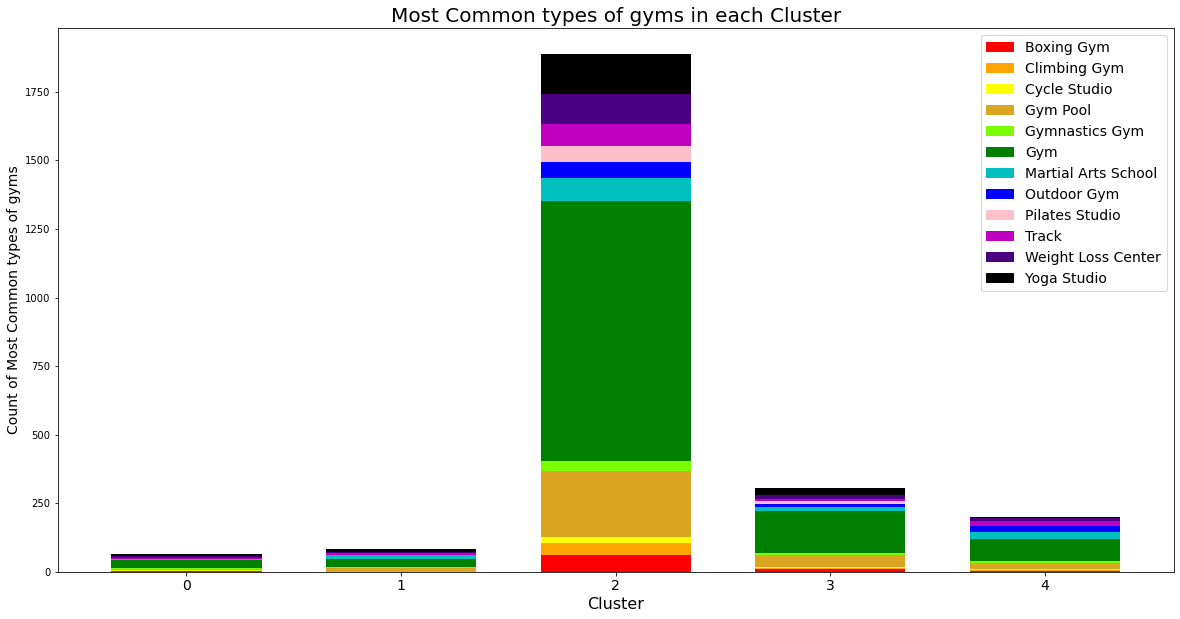

In [29]:
# Create a bar chart of most common venues of each cluster
my_colors = ['r','orange','yellow','goldenrod','lawngreen','g','c','b','pink','m','indigo','k','brown','cyan','deeppink','slategrey','olive','teal']
cv_plot = df_bycluster.plot(kind='bar', stacked=True,
                            figsize=(20,10), color=my_colors,
                            width=0.7)
plt.title("Most Common types of gyms in each Cluster", fontsize=20)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Count of Most Common types of gyms", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1),labels=df_bycluster.columns, fontsize=14)
plt.xticks(rotation=0, fontsize=14)